# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

To define the most profitable item, I calculated the total profit in dollars across all sales of that liquor while considering both margin and volume. 

For per-ml margin, I subtracted the state bottle cost from state bottle retail and then divided by the bottle volume in ml. This is the profit earned for each ml of the liquor. For the row profit, I multiplied the per-ml margin by the bottle volume in ml and the number of bottles sold. This is the total profit from a single transaction. Summing row profit for each item description gives the total profit per liquor brand/size. 

This definition of profitability is important since some brands appear in multiple bottle sizes. Simply counting "bottles sold" would over-weight smaller sized containers. By normalizing profit to the actual liquid volume then aggregating, I can capture both the price markup and the true quantity sold which gives a fair measure of which liquor generates the highest overall profit. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/hayeonchung/understanding_uncertainty/data/iowa.csv")

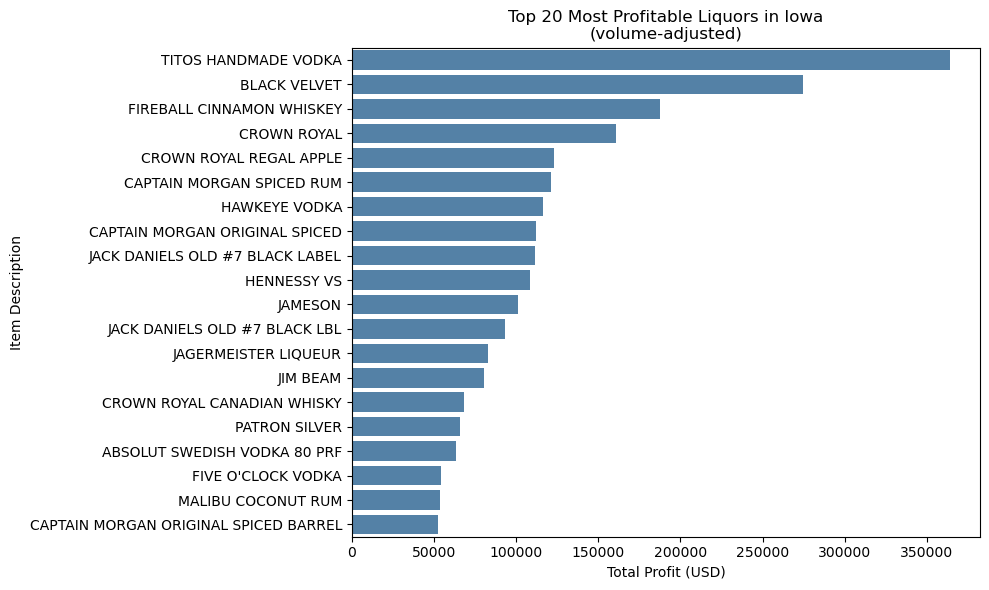

In [2]:
# Margin per ml
df["margin_per_ml"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) / df["Bottle Volume (ml)"]
# Total ml sold for each row
df["ml_sold"] = df["Bottle Volume (ml)"] * df["Bottles Sold"]
# Profit per row based on total ml sold
df["row_profit"] = df["margin_per_ml"] * df["ml_sold"]

top_n = 20
top_items = (
    df.groupby("Item Description", dropna=False, as_index=False)
      .agg(total_profit=("row_profit", "sum"))
      .sort_values("total_profit", ascending=False)
      .head(top_n)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_items,
    x="total_profit",
    y="Item Description",
    orient="h",
    color="steelblue",
    errorbar=None
)
plt.xlabel("Total Profit (USD)")
plt.ylabel("Item Description")
plt.title(f"Top {len(top_items)} Most Profitable Liquors in Iowa\n(volume-adjusted)")
plt.tight_layout()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [3]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

When I try to substract x and y, I get an error that says "operands could not be broadcast together with shapes (3,) (2,)". 

In [4]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

The shapes become (3,1) and (1,2) respectively and broadcasts to (3,2). x is treated as a column vector and y as a row vector which is how I get the outer difference. 

In [5]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

Shapes become (1,3) and (2,1) which broadcasts to (2,3). This produces the row-wise outer difference which is the transpose of the previous answer. To compare this with the previous output, both are outer difference tables while the previous answer is shaped (3,2) and this is shaped (2,3). The previous output has rows for x and columns for y while this has rows for y and columns for x. 

In [6]:
# Two double for-loops that replicate the results of the previos two answers 
# Loop replica of: x.reshape(-1,1) - y.reshape(1,-1); Shape (3,2)
loop1 = np.zeros((x.size, y.size), dtype=int)
for i in range(x.size):      # Rows correspond to elements of x
    for j in range(y.size):  # Columns correspond to elements of y
        loop1[i, j] = x[i] - y[j]
loop1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [7]:
# Loop replica of: x.reshape(1,-1) - y.reshape(-1,1); Shape (2,3)
loop2 = np.zeros((y.size, x.size), dtype=int)
for i in range(y.size):      # Rows correspond to elements of y
    for j in range(x.size):  # Columns correspond to elements of x
        loop2[i, j] = x[j] - y[i]
loop2

array([[-1,  1,  3],
       [-4, -2,  0]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

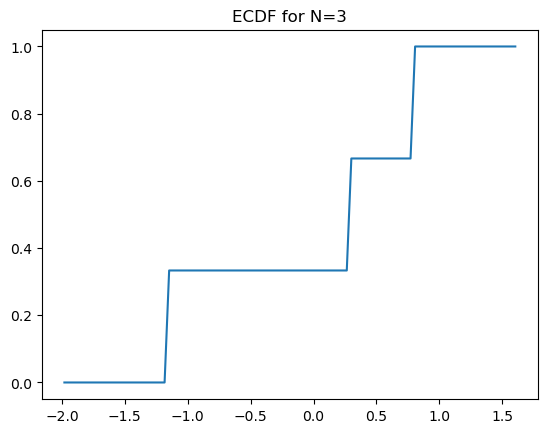

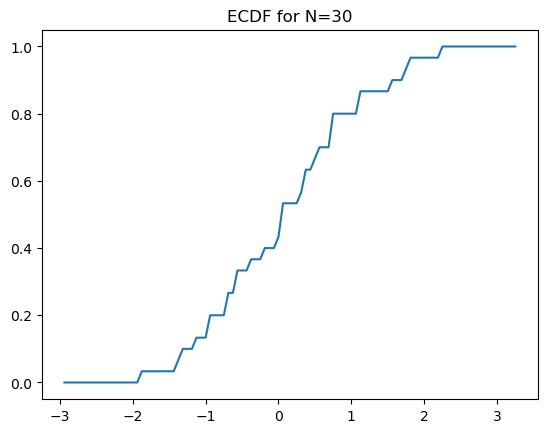

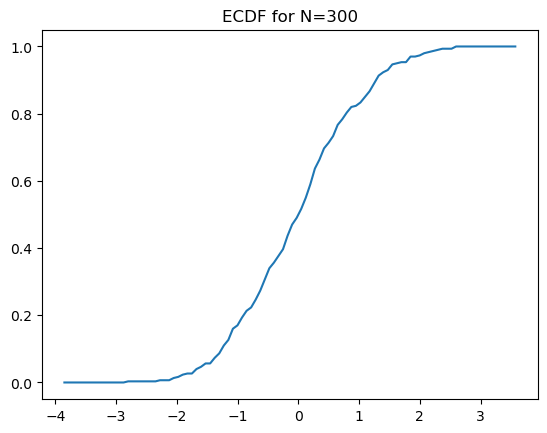

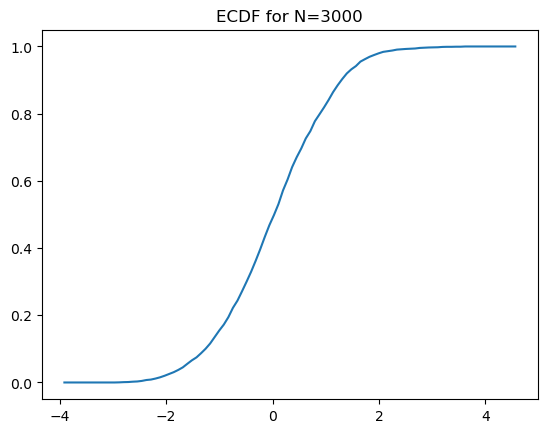

In [8]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 100)
    ecdf = 0 * grid.copy()
    for x in X: 
        ecdf += (grid >= x).astype(int)
    ecdf = ecdf/len(X)
    sns.lineplot(x=grid, y=ecdf).set(title=f'ECDF for N={N}')
    plt.show()

### Plotting indicator function for any z

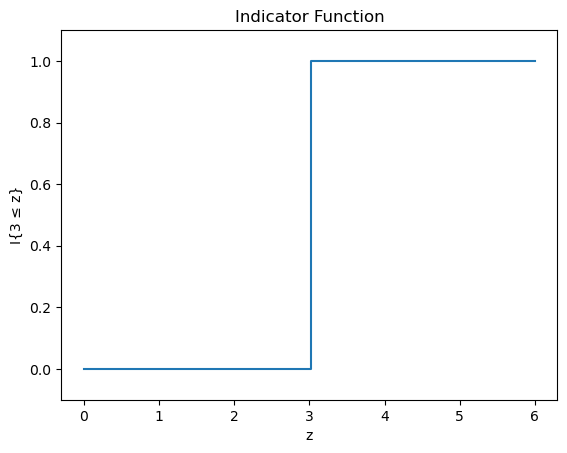

In [9]:
x_fixed = 3                  
z_vals = np.linspace(0, 6, 200)
indicator_vals = (x_fixed <= z_vals).astype(int)  # 1 if 3 <= z

plt.step(z_vals, indicator_vals, where='post')
plt.title(r'Indicator Function')
plt.xlabel('z')
plt.ylabel('I{3 ≤ z}')
plt.ylim(-0.1, 1.1)
plt.show()

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [10]:
# Funcation that computes any quantile without using Numpy's np.quantile
def quantile_manual(x, q):
    x = np.asarray(pd.Series(x).dropna().values, dtype=float)
    n = x.size
    if n == 0:
        return np.nan
    if q <= 0: 
        return np.min(x)
    if q >= 1: 
        return np.max(x)

    x_sorted = np.sort(x)
    p = q * (n - 1)
    low = int(np.floor(p))
    high = int(np.ceil(p))
    g = p - low
    return (1 - g) * x_sorted[low] + g * x_sorted[high]

# Function that computes the IQR 
def iqr_manual(x):
    q1 = quantile_manual(x, 0.25)
    q3 = quantile_manual(x, 0.75)
    return q3 - q1, q1, q3

def whiskers_manual(x, k=1.5):
    IQR, Q1, Q3 = iqr_manual(x)
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return lower, upper, Q1, Q3, IQR

# Function that computes a five-number summary and values for a boxplot
def five_number_summary(x):
    x = pd.Series(x).dropna().values
    Q1 = quantile_manual(x, 0.25)
    Q2 = quantile_manual(x, 0.50)
    Q3 = quantile_manual(x, 0.75)
    mn = float(np.min(x)) if len(x) else np.nan
    mx = float(np.max(x)) if len(x) else np.nan
    low_w, up_w, *_ = whiskers_manual(x)
    return {
        "min": mn,
        "Q1": Q1,
        "median": Q2,
        "Q3": Q3,
        "max": mx,
        "lower_whisker": low_w,
        "upper_whisker": up_w
    }

# Function that returns a Boolean vector indicating if the observations are outliers
def outlier_mask(x, k=1.5):
    """
    Boolean vector: True if observation is an outlier
    (outside Tukey whiskers).
    """
    x = pd.Series(x)
    low_w, up_w, *_ = whiskers_manual(x.dropna().values, k=k)
    return (x < low_w) | (x > up_w)


Manual Quantiles:
  Q1  : 320.0
  Q2  : 480.0
  Q3  : 576.0

IQR : 256.0

Whiskers: Lower = -64.0 , Upper = 960.0

Five-number summary: {'min': 0.0, 'Q1': np.float64(320.0), 'median': np.float64(480.0), 'Q3': np.float64(576.0), 'max': 1488.0, 'lower_whisker': np.float64(-64.0), 'upper_whisker': np.float64(960.0)}

Number of outliers: 42

Pandas describe() output:
count    2929.000000
mean      472.819734
std       215.046549
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: Garage.Area, dtype: float64


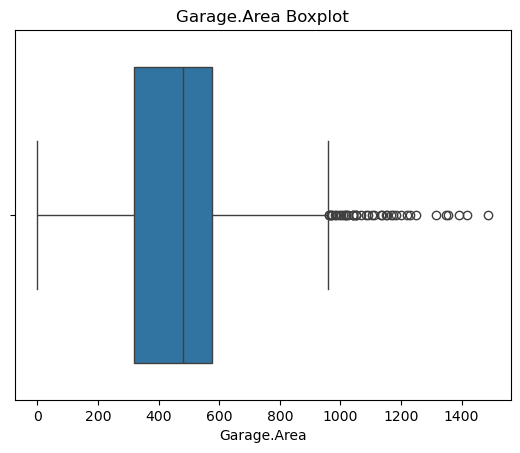

In [17]:
# Numeric variable of my choice & Comparing function outputs with sns.boxplot and df.describe
df2 = pd.read_csv("/Users/hayeonchung/understanding_uncertainty/data/ames_prices.csv")
x = df2["Garage.Area"].dropna()

print("Manual Quantiles:")
print("  Q1  :", quantile_manual(x, 0.25))
print("  Q2  :", quantile_manual(x, 0.50))
print("  Q3  :", quantile_manual(x, 0.75))

IQR, Q1, Q3 = iqr_manual(x)
print("\nIQR :", IQR)

wh_low, wh_up, *_ = whiskers_manual(x)
print("\nWhiskers: Lower =", wh_low, ", Upper =", wh_up)

five_num = five_number_summary(x)
print("\nFive-number summary:", five_num)

outliers = outlier_mask(x)
print("\nNumber of outliers:", outliers.sum())

print("\nPandas describe() output:")
print(df2["Garage.Area"].describe())

sns.boxplot(x=x)
plt.title("Garage.Area Boxplot")
plt.show()

As seen by the outputs, my "manual" functions produce the same results as Numpy's functions.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?